#House Price Prediction
_______
By Ahmed ali

##Environment set-up

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error

-------------

##Data Wrangling
In this section, we would load our desired data from a flat csv file using pandas to further explore our data.

In [2]:
df = pd.read_csv('/content/HousePricePrediction.csv')
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
df.shape

(2919, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1459.000000,842.787043,0.0,729.5,1459.0,2188.5,2918.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


_________________

##Data Cleaning
In this section, we would dive deeper into exploring our dataset and perform cleaning operations like (dropping columns, handling NaNs, converting data types). All of which would help us reach a more accurate result in answering our investigating questions.

In [6]:
def CountNulls() :
    global df
    for col in df.columns :
        if not df[col].isna().sum() == 0 :
            print(f'Column {col} has number of nulls {df[col].isna().sum()}')
    print('Counting Nulls Ends .')
CountNulls()

Column MSZoning has number of nulls 4
Column Exterior1st has number of nulls 1
Column BsmtFinSF2 has number of nulls 1
Column TotalBsmtSF has number of nulls 1
Column SalePrice has number of nulls 1459
Counting Nulls Ends .


In [7]:
# dropping NaNs in profic column and confirming
df.dropna(inplace = True)
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


In [8]:
df.shape

(1460, 13)

In [9]:
objList = df.select_dtypes(include = "object").columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   int64  
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   int64  
 5   BldgType      1460 non-null   int64  
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   int64  
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 159.7 KB
None


In [10]:
df.nunique()

,0
Id,1460
MSSubClass,15
MSZoning,5
LotArea,1073
LotConfig,5
BldgType,5
OverallCond,9
YearBuilt,112
YearRemodAdd,61
Exterior1st,15


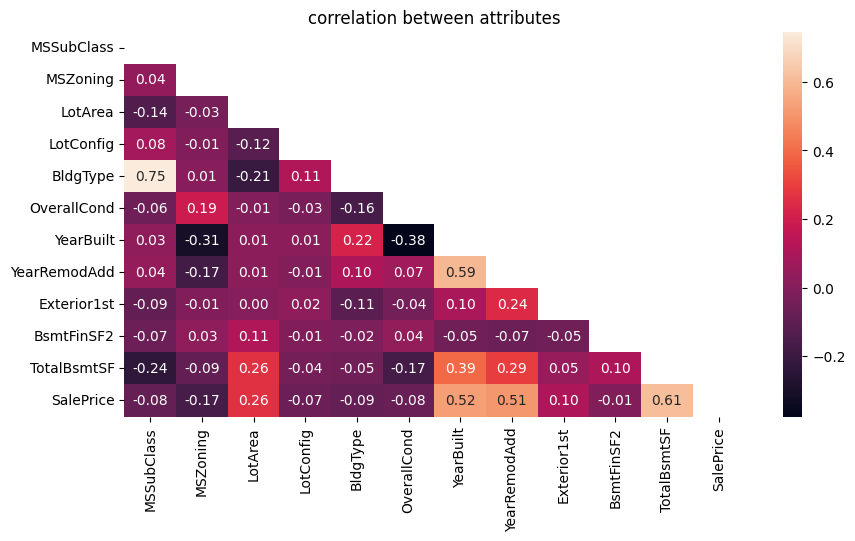

In [20]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

In [23]:
df.drop(['MSSubClass','LotConfig','BldgType',"OverallCond",'BsmtFinSF2'],axis =1,inplace=True)

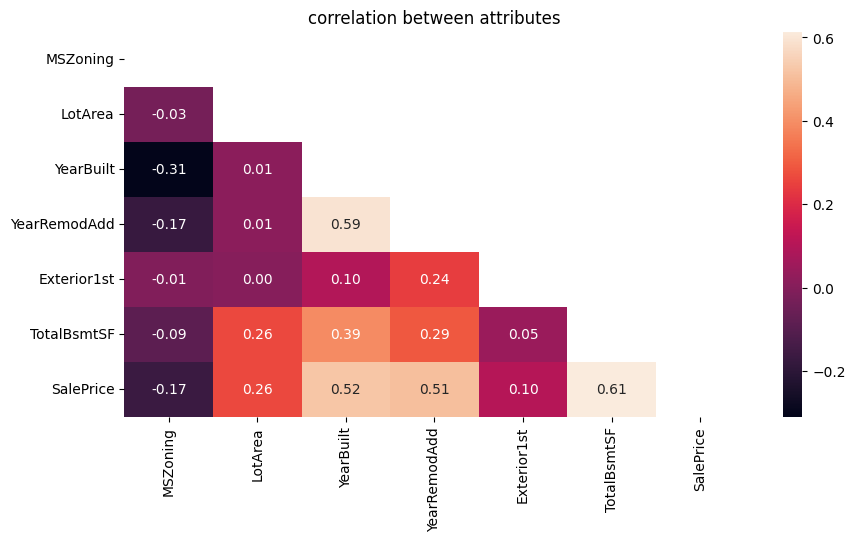

In [24]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

In [26]:
df.duplicated().sum()

0

In [27]:
df.head()

,MSZoning,LotArea,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,3,8450,2003,2003,12,856.0,208500.0
1,3,9600,1976,1976,8,1262.0,181500.0
2,3,11250,2001,2002,12,920.0,223500.0
3,3,9550,1915,1970,13,756.0,140000.0
4,3,14260,2000,2000,12,1145.0,250000.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,MSZoning,LotArea,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,-0.045532,-0.207142,1.050994,0.878668,0.743092,-0.459303,0.347273
1,-0.045532,-0.091886,0.156734,-0.429577,-0.508251,0.466465,0.007288
2,-0.045532,0.073480,0.984752,0.830215,0.743092,-0.313369,0.536154
3,-0.045532,-0.096897,-1.863632,-0.720298,1.055928,-0.687324,-0.515281
4,-0.045532,0.375148,0.951632,0.733308,0.743092,0.199680,0.869843


##Modeiling

In [35]:
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [56]:
# from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
# from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error

# LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
# SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
# LassoRegressionModel = Lasso(alpha=1.0,random_state=33)
# RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
# RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
# GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
# SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf')
# DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
# KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')


# Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
#           GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]





# for Model in Models :
#     print(f'for Model {str(Model).split("(")[0]}')
#     Model.fit(X_train, y_train)
#     print(f'Train Score is : {Model.score(X_train, y_train)}')
#     print(f'Test Score is : {Model.score(X_test, y_test)}')
#     y_pred = Model.predict(X_test)
#     print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
#     print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
#     print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
#     print('=================================================')





for Model LinearRegression
Train Score is : 0.5393747248589312
Test Score is : 0.5183578324267583
MAE value is  : 0.5118322797404677
MSE value is  : 0.5057347634089762
MdSE value is  : 0.3867267373742429
for Model SGDRegressor
Train Score is : 0.4328234485565713
Test Score is : 0.3879769650761302
MAE value is  : 0.522098667045671
MSE value is  : 0.642637513089007
MdSE value is  : 0.3455809036251158
for Model Lasso
Train Score is : 0.0
Test Score is : -0.003338097705161136
MAE value is  : 0.7427473711654159
MSE value is  : 1.0535268496502017
MdSE value is  : 0.5664004926121394
for Model Ridge
Train Score is : 0.5393745781262839
Test Score is : 0.5183187434283845
MAE value is  : 0.5118084190710419
MSE value is  : 0.5057758077084072
MdSE value is  : 0.3867368432799031
for Model RandomForestRegressor
Train Score is : 0.8979455997716899
Test Score is : 0.6793443669689843
MAE value is  : 0.381337484833748
MSE value is  : 0.33669539675849924
MdSE value is  : 0.24863997687739242
for Model Grad

In [58]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
model=RandomForestRegressorModel.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5393747248589312
Mean Absolute Error :  0.4570645570843961


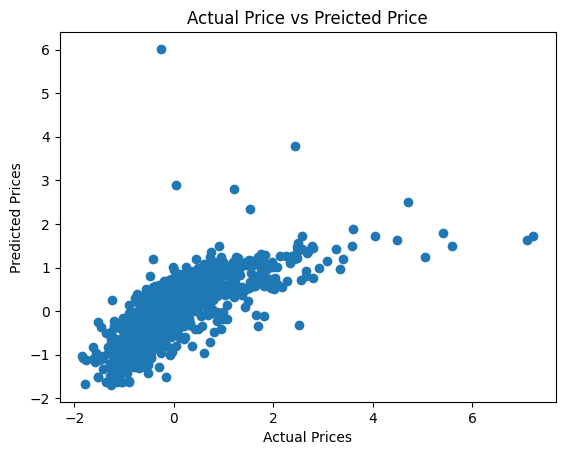

In [60]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [61]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6793443669689843
Mean Absolute Error :  0.381337484833748
